In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from RTfuncs import *
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import copy 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score


#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

2023-08-31 16:23:53.368449: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-31 16:23:53.392988: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:23:53.620688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:23:53.627277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 16:23:55.942663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
path_X_test_preprocessed= '/home/xryrapier/code/xryrpapier/eficient_frontier/raw_data/X_test_preprocessed.csv'
path_X_train_preprocessed= '/home/xryrapier/code/xryrpapier/eficient_frontier/raw_data/X_train_preprocessed.csv'
path_y_train= '/home/xryrapier/code/xryrpapier/eficient_frontier/raw_data/y_train.csv'
path_y_test= '/home/xryrapier/code/xryrpapier/eficient_frontier/raw_data/y_test.csv'
X_test_preprocessed= pd.read_csv(path_X_test_preprocessed)
X_train_preprocessed=pd.read_csv(path_X_train_preprocessed)
y_train=pd.read_csv(path_y_train)
y_test=pd.read_csv(path_y_test)

In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
deep_copy(X_test_preprocessed)
deep_copy(X_train_preprocessed)
deep_copy(y_train)
deep_copy(y_test)

shape_X_test = X_test_preprocessed.shape
shape_X_train = X_train_preprocessed.shape
shape_y_train = y_train.shape
shape_y_test = y_test.shape

print("Shape of X_test:", shape_X_test)
print("Shape of X_train:", shape_X_train)
print("Shape of y_train:", shape_y_train)
print("Shape of y_test:", shape_y_test)


Shape of X_test: (3950, 20)
Shape of X_train: (15798, 20)
Shape of y_train: (15798, 1)
Shape of y_test: (3950, 1)


<a id='4'></a>
# 1. Evaluate Algorithms and Models

Let us evaluate the algorithms and the models. 

<a id='4.1'></a>
## 1.1. Train Test Split

Performing a train and test split in this step. 

In [7]:
#X_train, X_validation, Y_train, Y_validation = prepare_train_validation_sets(dataset, 'RT', test_size=0.2, random_state=3)

<a id='4.2'></a>
## 4.2. Test Options and Evaluation Metrics


In [6]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
scoring ='neg_mean_absolute_error'
scoring = 'r2'

<a id='4.3'></a>
## 4.3. Compare Models and Algorithms

### Regression Models

In [7]:
regression_models = create_regression_models()

### K-folds cross validation

In [9]:
model_names, model_results, best_model = perform_cross_validation_and_store_results_with_best_model(regression_models, X_train_preprocessed, y_train, num_folds=10, seed=3)

### Algorithm comparison

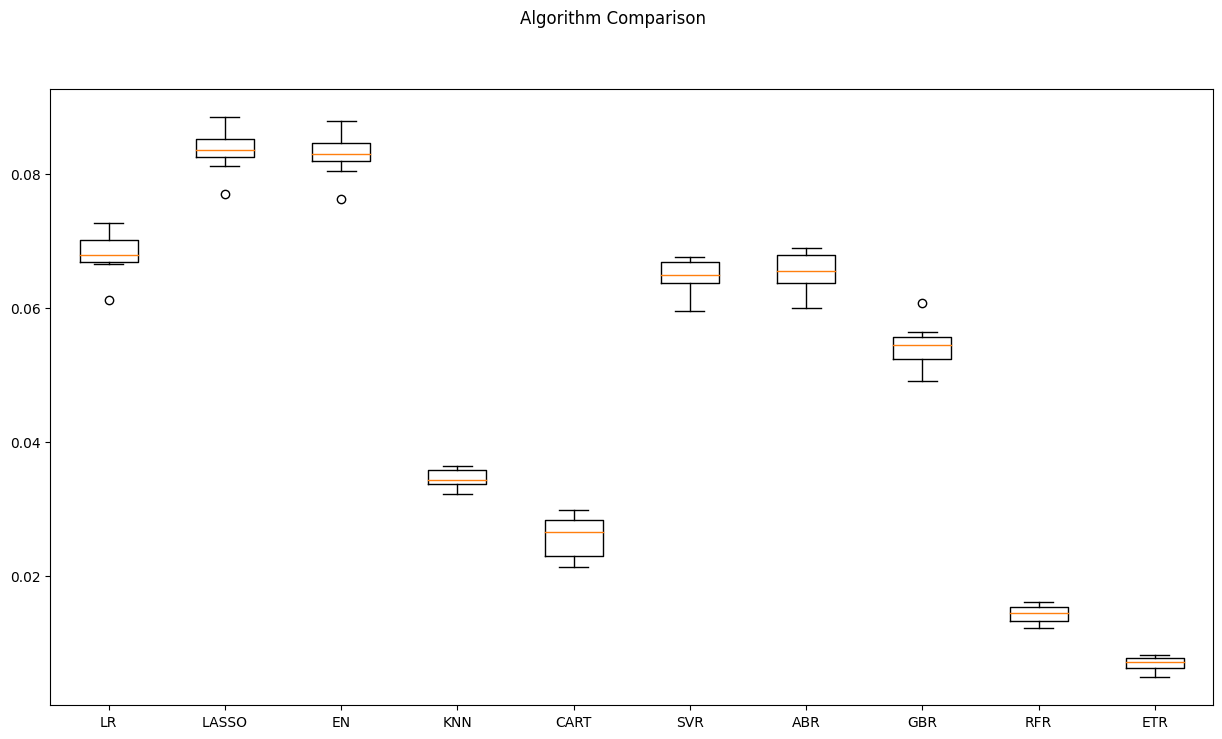

In [10]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(15,8)
plt.show()

The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search. 

<a id='5'></a>
# 5. Model Tuning and Grid Search

Given that the Random Forest is the best model, Grid Search is performed on Random Forest.

In [12]:
def perform_grid_search(X_train, Y_train, best_model, num_folds=10, seed=None, scoring='neg_mean_squared_error'):
    param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400]}
    model = best_model(random_state=seed)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, Y_train)

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
perform_grid_search(X_train_preprocessed, y_train, ExtraTreesRegressor, num_folds=10, seed=3)

KeyboardInterrupt: 

<a id='6'></a>
# 6. Finalise the Model

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [ ]:
model= create_and_fit_model(X_train, Y_train, ExtraTreesRegressor, n_estimators=150)

In [ ]:
predictions_train = model.predict(X_train)
r2_train = calculate_r2_score(predictions_train, Y_train)
print("R^2 Score (Train):", r2_train)

In [ ]:
mse, r2 = evaluate_regression_model(model, X_validation, Y_validation)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

From the mean square error and R2 shown above for the test set, the results look good. 

<a id='6.2'></a>
## 6.2. Feature Importance and Features Intuition

Looking at the details above Random forest be worthy of further study.
Let us look into the Feature Importance of the RF model

In [ ]:
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the chart above, income and networth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature. 

<a id='6.3'></a>
## 6.3. Save Model for Later Use

In [ ]:
model_filename = 'finalized_model.sav'
save_model_to_pickle(model, model_filename)

In [ ]:
model_filename = 'finalized_model.sav'
load_and_evaluate_model(model_filename, X_validation, Y_validation)


__Conclusion__:

We showed that machine learning models might be able to objectively
analyze the behavior of different investors in a changing market and attribute these
changes to variables involved in determining risk appetite. With an increase in the
volume of investor’s data and availability of rich machine learning infrastructure,
such models might prove to be more useful.

We saw that there is a non-linear relationship between the variables and the risk tolerance. Income and net worth followed by age and willingness to take risk are the key variables to decide the risk tolerance. These variables have been considered as the key variables to model the risk tolerance across several literature.
